# Housing Value Predictor

# Australia - Melbourne

In [3]:
import numpy as np 
import pandas as pd 

from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error 
from sklearn import ensemble
from sklearn.externals import joblib

import matplotlib.pyplot as plt 
from matplotlib import style 
style.use("ggplot")

from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor 


from sklearn.neighbors import KNeighborsClassifier

In [4]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
   return false;
}

<IPython.core.display.Javascript object>

In [5]:
Aus_housing = pd.read_csv("Aussie_Melbourne_housing_data.csv")
Aus_housing.shape

(18396, 22)

In [6]:
df = Aus_housing
df.head()

,Unnamed: 0,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [7]:
df.isnull().any()

Unnamed: 0       False
Suburb           False
Address          False
Rooms            False
Type             False
Price            False
Method           False
SellerG          False
Date             False
Distance          True
Postcode          True
Bedroom2          True
Bathroom          True
Car               True
Landsize          True
BuildingArea      True
YearBuilt         True
CouncilArea       True
Lattitude         True
Longtitude        True
Regionname        True
Propertycount     True
dtype: bool

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18396 entries, 0 to 18395
Data columns (total 22 columns):
Unnamed: 0       18396 non-null int64
Suburb           18396 non-null object
Address          18396 non-null object
Rooms            18396 non-null int64
Type             18396 non-null object
Price            18396 non-null float64
Method           18396 non-null object
SellerG          18396 non-null object
Date             18396 non-null object
Distance         18395 non-null float64
Postcode         18395 non-null float64
Bedroom2         14927 non-null float64
Bathroom         14925 non-null float64
Car              14820 non-null float64
Landsize         13603 non-null float64
BuildingArea     7762 non-null float64
YearBuilt        8958 non-null float64
CouncilArea      12233 non-null object
Lattitude        15064 non-null float64
Longtitude       15064 non-null float64
Regionname       18395 non-null object
Propertycount    18395 non-null float64
dtypes: float64(12), int6

In [9]:
# Data Cleaning - remove unnamed column
del df['Unnamed: 0']

In [10]:
df.rename(index=str, columns={"Bedroom2": "Bedrooms", "Landsize": "Lotsize","Lattitude": "Latitude","Longtitude": "Longitude"}, inplace=True)
df.describe()

,Rooms,Price,Distance,Postcode,Bedrooms,Bathroom,Car,Lotsize,BuildingArea,YearBuilt,Latitude,Longitude,Propertycount
count,18396.000000,1.839600e+04,18395.000000,18395.000000,14927.000000,14925.000000,14820.000000,13603.000000,7762.000000,8958.000000,15064.000000,15064.000000,18395.000000
mean,2.935040,1.056697e+06,10.389986,3107.140147,2.913043,1.538492,1.615520,558.116371,151.220219,1965.879996,-37.809849,144.996338,7517.975265
std,0.958202,6.419217e+05,6.009050,95.000995,0.964641,0.689311,0.955916,3987.326586,519.188596,37.013261,0.081152,0.106375,4488.416599
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.330000e+05,6.300000,3046.000000,2.000000,1.000000,1.000000,176.500000,93.000000,1950.000000,-37.858100,144.931193,4294.000000
50%,3.000000,8.800000e+05,9.700000,3085.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.803625,145.000920,6567.000000
75%,3.000000,1.302000e+06,13.300000,3149.000000,3.000000,2.000000,2.000000,651.000000,174.000000,2000.000000,-37.756270,145.060000,10331.000000
max,12.000000,9.000000e+06,48.100000,3978.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


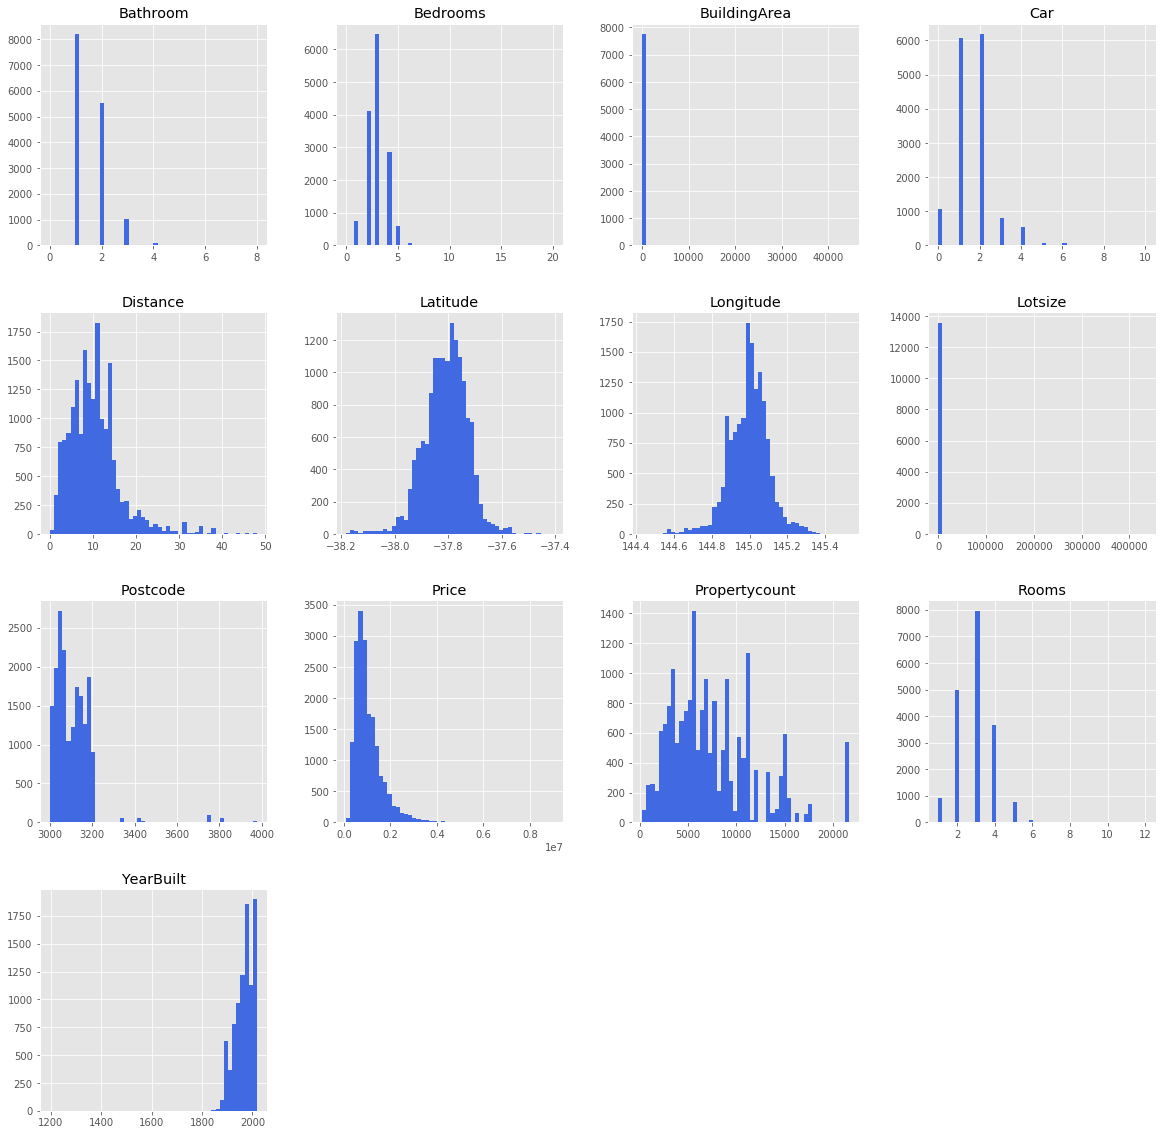

In [11]:
%matplotlib inline

df.hist(bins=50, figsize=(20,20), color="royalblue")
plt.show()

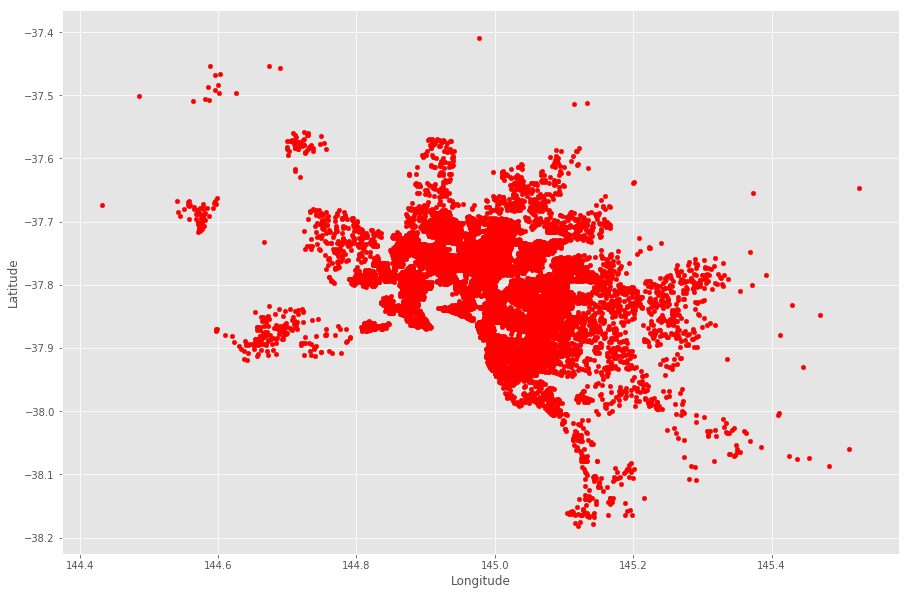

In [12]:
df.plot(kind = "scatter", x= "Longitude", y = "Latitude", figsize = (15,10), color="red" )

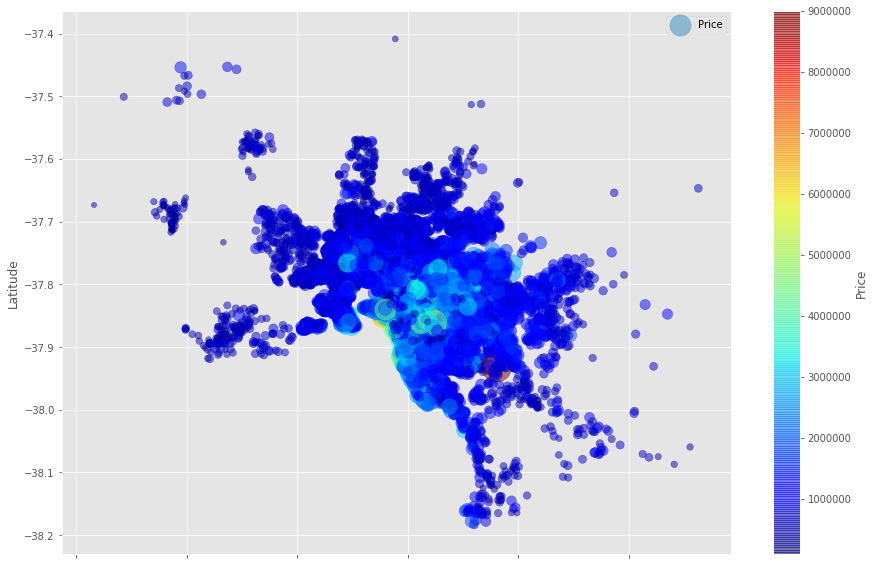

In [13]:
df.plot(kind = "scatter", x = "Longitude", y = "Latitude", alpha = 0.5, s = df["Price"]/10000, 
             label = "Price", figsize = (15,10), c = "Price", cmap = plt.get_cmap("jet"), colorbar = True)

plt.legend()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DA2852EC18>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001DA2811EC88>]], dtype=object)

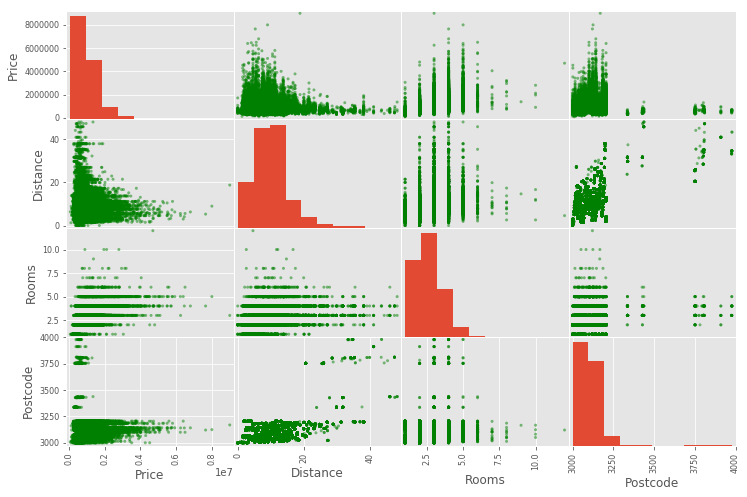

In [14]:
from pandas.plotting import scatter_matrix
attributes = ["Price", "Distance", "Rooms", "Postcode"]
scatter_matrix(df[attributes], figsize=(12, 8), color="green")

In [15]:
# Data scrubbing

del df['Address']

In [16]:
del df['Method']

In [17]:
del df['SellerG']

In [18]:
del df['Date']

In [19]:
# del df['Postcode']

In [20]:
# del df['Latitude']

In [21]:
# del df['Longitude']

In [22]:
del df['Regionname']

In [23]:
del df['Propertycount']

In [24]:
# Remove rows with missing data
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

In [25]:
# One-hot encoding
features_df = pd.get_dummies(df, columns=['Suburb', 'CouncilArea', 'Type'])

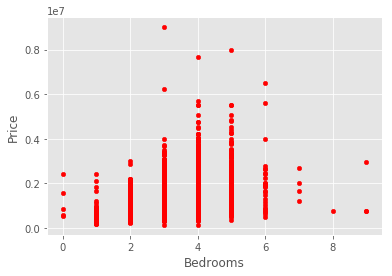

In [26]:
df.plot(kind="scatter", x= "Bedrooms" , y= "Price", color = "red")
plt.show()

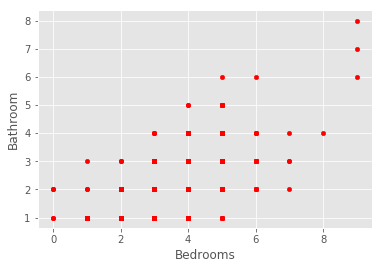

In [27]:
df.plot(kind="scatter", x= "Bedrooms" , y= "Bathroom", color = "red")
plt.show()

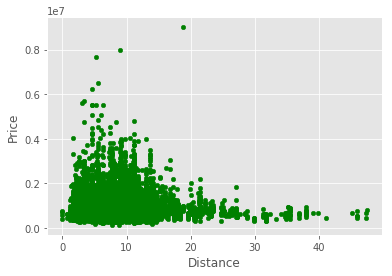

In [28]:
df.plot(kind="scatter", x= "Distance" , y= "Price", color = "green")
plt.show()

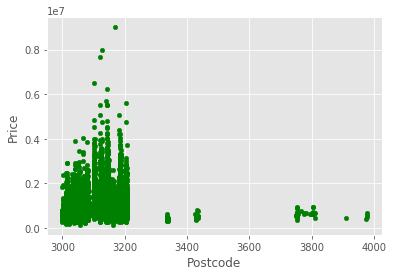

In [29]:
df.plot(kind="scatter", x= "Postcode" , y= "Price", color = "green")
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DA271DF208>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001DA275245C0>]], dtype=object)

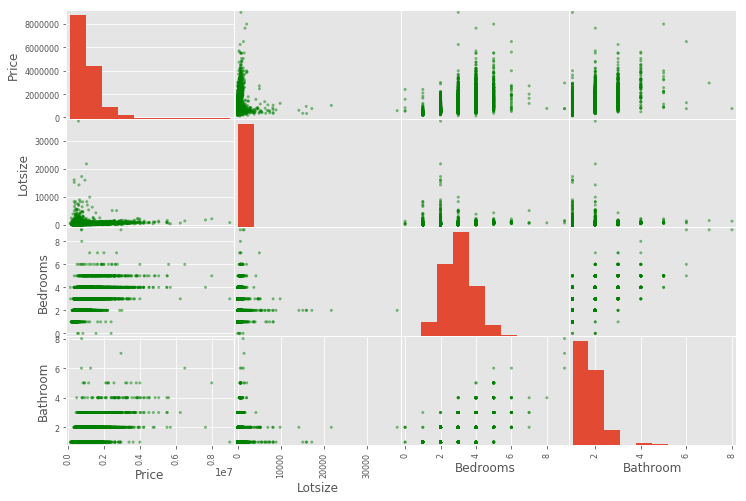

In [30]:
from pandas.plotting import scatter_matrix
attributes = ["Price", "Lotsize", "Bedrooms", "Bathroom"]
scatter_matrix(df[attributes], figsize=(12, 8), color="green")

In [31]:
del features_df['Price']

X = features_df.as_matrix()
y = df['Price'].as_matrix()

In [32]:
df.to_csv("out_clean_Aussie_housing_data.csv", encoding='utf-8', index=False)

In [33]:
df.head()

,Suburb,Rooms,Type,Price,Distance,Postcode,Bedrooms,Bathroom,Car,Lotsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longitude
1,Abbotsford,2,h,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934
2,Abbotsford,3,h,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944
4,Abbotsford,4,h,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941
6,Abbotsford,3,h,1876000.0,2.5,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.8024,144.9993
7,Abbotsford,2,h,1636000.0,2.5,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.8060,144.9954


In [34]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.3, random_state=0)

In [35]:
# Create Gradient Boosting Regressor Model

model = ensemble.GradientBoostingRegressor(n_estimators=500, learning_rate=0.1, max_depth=15, min_samples_split=4, min_samples_leaf=6, max_features=0.6, loss='huber')

In [36]:
# Run model on training data

model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='huber', max_depth=15,
             max_features=0.6, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=6, min_samples_split=4,
             min_weight_fraction_leaf=0.0, n_estimators=500,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [37]:
# Save model

joblib.dump(model, 'trained_model.pkl')

['trained_model.pkl']

In [38]:
# Check model accuracy

mse_train = mean_absolute_error(y_train, model.predict(X_train))
mse_test = mean_absolute_error(y_test, model.predict(X_test))
R2 = r2_score(y_test, model.predict(X_test))

print("Mean Absolute Error of Training Set: $ %4f" %mse_train)
print("Mean Absolute Error of Test Set: $ %4f" %mse_test)
print("Mean R2score: %4f" %R2)

Mean Absolute Error of Training Set: $ 13072.927095
Mean Absolute Error of Test Set: $ 165473.731411
Mean R2score: 0.783016


In [39]:
# Create new Gradient Boosting Regressor Model

model = ensemble.GradientBoostingRegressor()

In [40]:
# Set Hyperparameters
param_grid = {
    'n_estimators': [30,60,100],
    'max_depth': [7,9,11],
    'min_samples_split': [3,4,5],
    'min_samples_leaf': [5,6,7],
    'learning_rate': [0.01, 0.02, 0.6, 0.7],
    'max_features': [0.8, 0.9],
    'loss': ['ls', 'lad', 'huber']
}

In [ ]:
# Define Refined Grid_search CV Model (using default 3-fold cross-validation)

gs_cv=GridSearchCV(model, param_grid, n_jobs=1)

In [ ]:
# Run model on training data

gs_cv.fit(X_train, y_train)

In [ ]:
print(gs_cv.best_params_)

In [ ]:
# Check model accuracy

mse_train = mean_absolute_error(y_train, gs_cv.predict(X_train))
mse_test = mean_absolute_error(y_test, gs.cv.predict(X_test))
R2 = r2_score(y_test, model.predict(X_test))

print("Mean Absolute Error of Training Set: $ %4f" %mse_train)
print("Mean Absolute Error of Test Set: $ %4f" %mse_test)
print("Mean R2score: %4f" %R2)